In [1]:
from Multidimensional_Uns_Optimizer import MultidimensionalUnconstrainedOptimizerBase

In [2]:
def f(v):
    return (v[0]**2)+3*(v[1]**2)+(v[0]-2)*(v[1]-3)

model = MultidimensionalUnconstrainedOptimizerBase(f,[0,0],1e-5)
x ,_,data = model.steepest_descent()

--------------------------------------------------
Lambda aproximation (first iteration)
Iter 1: x_k = 1.000000, grad = 0.548295, grad_2 = 4.153859, x_k+1 = 0.868004
Stopped after 1 iterations. Final approximation: x = 0.868004, grad_x 0.000002
--------------------------------------------------
Iter 1: x_k = [0, 0], lambda_k = 0.868004, d_k = [0.83205029 0.5547002 ], x_k+1 = [0.72222257 0.48148172]
Iter 2: x_k = [0.72222257 0.48148172], lambda_k = 0.503440, d_k = [ 0.55469944 -0.8320508 ], x_k+1 = [1.00148073 0.06259365]
Iter 3: x_k = [1.00148073 0.06259365], lambda_k = 0.270367, d_k = [0.83205272 0.55469656], x_k+1 = [1.22644074 0.21256557]
Iter 4: x_k = [1.22644074 0.21256557], lambda_k = 0.156813, d_k = [ 0.55469656 -0.83205272], x_k+1 = [1.31342448 0.08208874]
Iter 5: x_k = [1.31342448 0.08208874], lambda_k = 0.084214, d_k = [0.83204823 0.55470329], x_k+1 = [1.38349475 0.12880263]
Iter 6: x_k = [1.38349475 0.12880263], lambda_k = 0.048843, d_k = [ 0.55470329 -0.83204823], x_k+1 = [

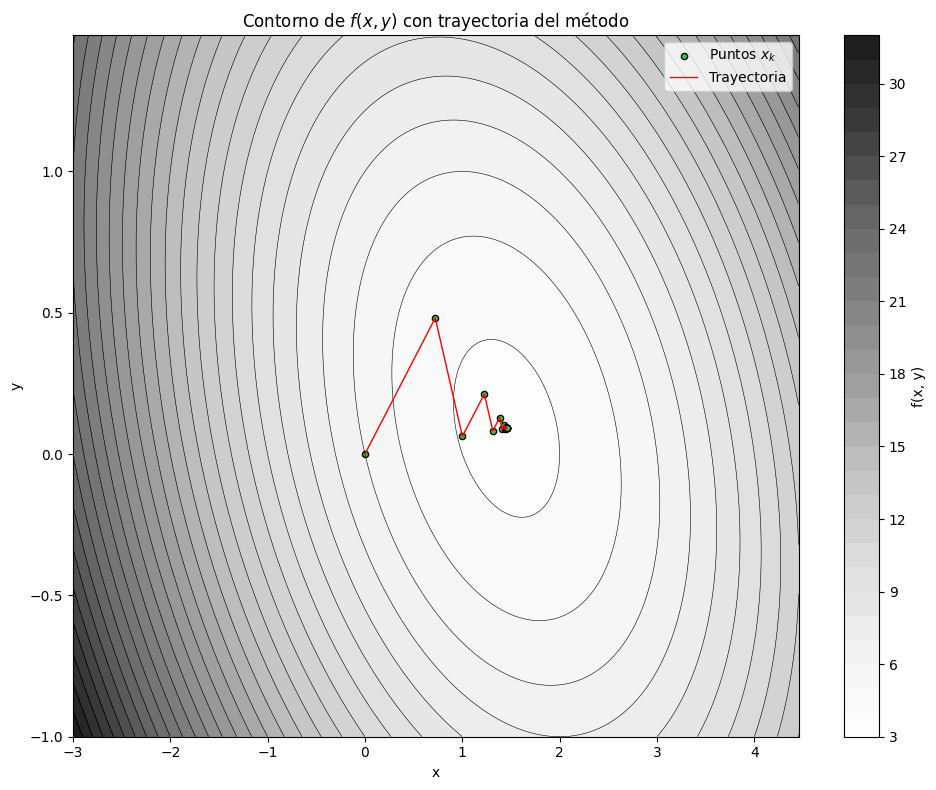

In [3]:
model.plot_contour_with_points_and_path(data,grid_size=150,levels=30)

In [4]:
model.plot_function_3d()

In [5]:
x_k_1,k,data = model.newton_method()

Iter 1: x_k = [0, 0], grad = [1.55564450e-07 6.29403196e-06], hessian = [[2.00000017 0.99999564]
 [0.99999564 6.0000005 ]], x_k+1 = [1.45454497 0.09091022]
Stopped after 1 iterations. Final approximation: x = [1.45454497 0.09091022]


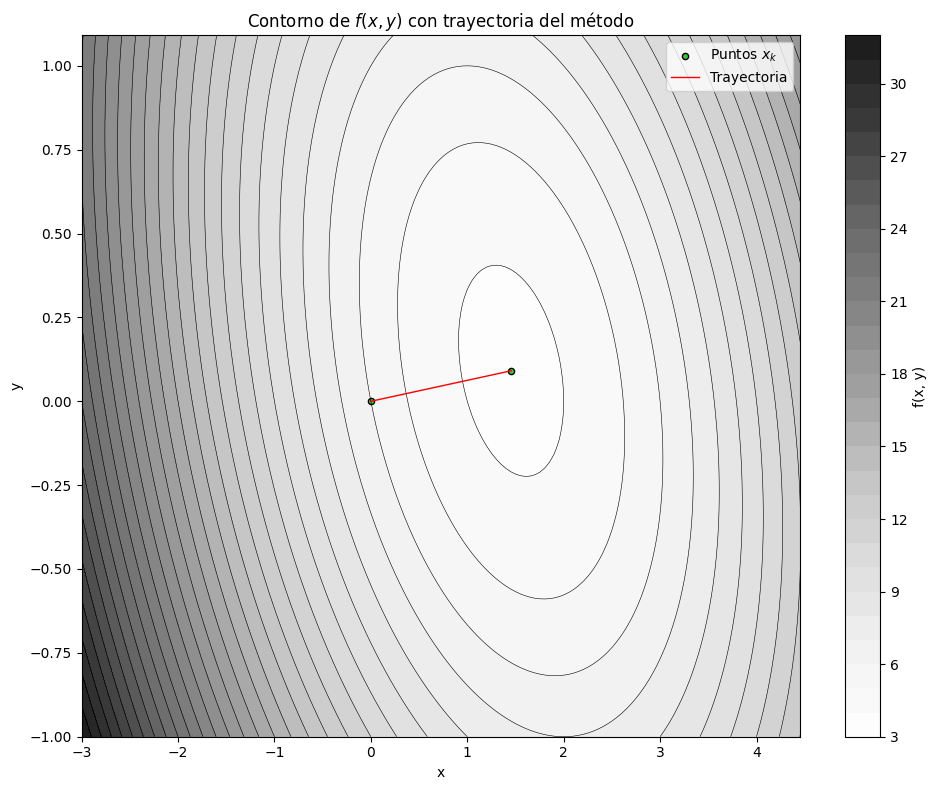

In [6]:
model.plot_contour_with_points_and_path(data,grid_size=150,levels=30)